## Collecting and Processing Temperature Data 
### Evolution of fire-induced damage in composite buildings
Data from figures in: Yang ZN, Dong YL, Xu WJ (2013) Fire tests on two-way concrete slabs in a full-scale multi-storey steel-framed building. Fire Saf J 58:38–48. https://doi.org/10.1016/j.firesaf.2013.01.023

In [70]:
import pandas as pd
import numpy as np

In [71]:
import sys
sys.path.append("../")
from data_processing_modules import time_regularisation as tr

Retrieve the temperatures in the slab as a data frame (df)

In [72]:
test2_slab_temps_df = pd.read_csv("../digitised_image_data/test2_slab_fig19b.csv")
test1_slab_temps_df = pd.read_csv("../digitised_image_data/test1_slab_fig19a.csv")

Create a regularised time interval to regularise the data first

In [73]:
regularised_time = np.arange(5.0,901,5.0)

Thickness values for each temperature array

In [74]:
corresponding_thicknesses = np.arange(120.0, -20.0, -20.0)

Create a list of numpy arrays from the df for time-regularisation

In [75]:
test2_list_of_np_arrays = []
for i, _ in enumerate(corresponding_thicknesses):
    test2_list_of_np_arrays.append(test2_slab_temps_df.iloc[:,i*2:i*2+2].dropna().to_numpy())   

In [76]:
test1_list_of_np_arrays = []
for i, _ in enumerate(corresponding_thicknesses):
    test1_list_of_np_arrays.append(test1_slab_temps_df.iloc[:,i*2:i*2+2].dropna().to_numpy())

Clean up the starting and ending time which is irregular due to noise from grabbing the data from the figure

In [77]:
for np_array in test2_list_of_np_arrays:
    np_array[0,0] = 1.0
    np_array[-1,0] = 900.0

In [78]:
for np_array in test1_list_of_np_arrays:
    np_array[0,0] = 1.0
    np_array[-1,0] = 900.0

Regularise the data using the regularise_data function

In [79]:
test2_regularised_data = tr.regularise_data(regularised_time, test2_list_of_np_arrays)

In [80]:
test1_regularised_data = tr.regularise_data(regularised_time, test1_list_of_np_arrays)

Sort the regularised data so that it corresponds to a sorted thickness value from smallest to largest

In [81]:
sort_mask = np.argsort(corresponding_thicknesses)
sorted_thicknesses = corresponding_thicknesses[sort_mask]
test2_sorted_regularised_data = test2_regularised_data[:,sort_mask + 1]

In [82]:
test1_sorted_regularised_data = test1_regularised_data[:,sort_mask + 1]

Interpolate for the required thickness values corresponding to the layered section temperature points

First, create a numpy array containing the desired locations:

In [83]:
num_of_temp_points = 9
temp_points = np.arange(0.0,121.0,120.0/(num_of_temp_points - 1))
print("There are {} temp points.\nThey are:{}".format(len(temp_points), temp_points))

There are 9 temp points.
They are:[  0.  15.  30.  45.  60.  75.  90. 105. 120.]


Call the column interpolation function from time_regularisation

In [84]:
test2_temp_points_temps = tr.interpolate_between_columns(sorted_thicknesses, test2_sorted_regularised_data, temp_points)

In [85]:
test1_temp_points_temps = tr.interpolate_between_columns(sorted_thicknesses, test1_sorted_regularised_data, temp_points)

In [86]:
test2_data = np.concatenate((regularised_time[:,np.newaxis], test2_temp_points_temps), axis = 1)

In [87]:
test1_data = np.concatenate((regularised_time[:,np.newaxis], test1_temp_points_temps), axis = 1)

In [88]:
headings = list(temp_points)
print("headings = {}".format(headings))
headings.insert(0,"time")
print("extended headings = {}".format(headings))

headings = [0.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120.0]
extended headings = ['time', 0.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120.0]


In [89]:
test2_regularised_data_df = pd.DataFrame(test2_data, columns=headings)

In [90]:
test1_regularised_data_df = pd.DataFrame(test1_data, columns=headings)

double check by plotting against the original data

In [91]:
import matplotlib.pyplot as plt

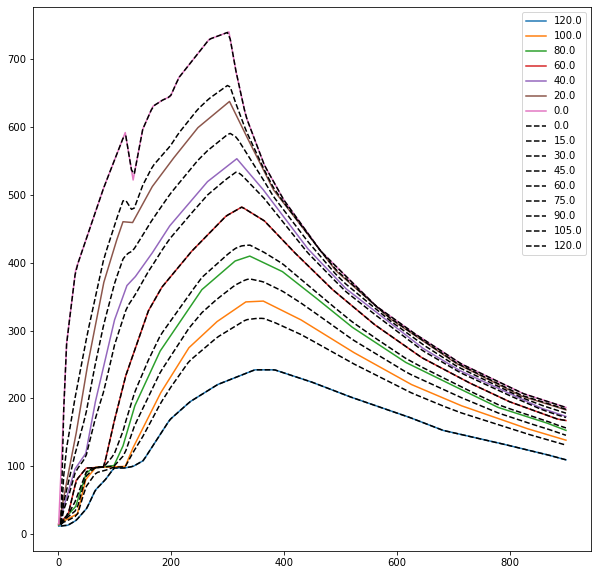

In [92]:
for array_index, array in enumerate(test2_list_of_np_arrays):
    plt.plot(array[:,0], array[:,1], label=corresponding_thicknesses[array_index])

column_names = test2_regularised_data_df.columns
for column_index, _ in enumerate(column_names):
    if column_index != 0:
        plt.plot(test2_regularised_data_df["time"], test2_regularised_data_df.iloc[:,column_index], '--k', label=headings[column_index])
plt.legend()
plt.gcf().set_size_inches(10., 10.)


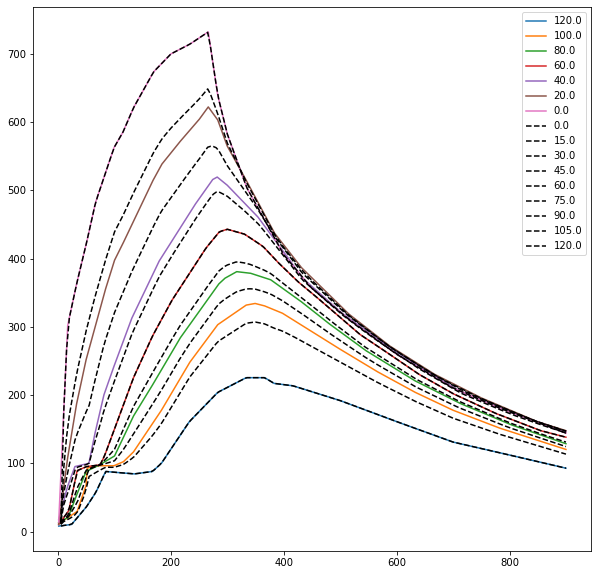

In [93]:
for array_index, array in enumerate(test1_list_of_np_arrays):
    plt.plot(array[:,0], array[:,1], label=corresponding_thicknesses[array_index])

column_names = test1_regularised_data_df.columns
for column_index, _ in enumerate(column_names):
    if column_index != 0:
        plt.plot(test1_regularised_data_df["time"], test1_regularised_data_df.iloc[:,column_index], '--k', label=headings[column_index])
plt.legend()
plt.gcf().set_size_inches(10., 10.)


now save the usable data:

In [94]:
test2_regularised_data_df.to_csv("../processed_temp_files/test2_slab_temp.dat", 
    float_format="%.1f", sep=" ", header=False, index=False)

In [95]:
test1_regularised_data_df.to_csv("../processed_temp_files/test1_slab_temp.dat", 
    float_format="%.1f", sep=" ", header=False, index=False)